Data Dictionary

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

*   market_id : integer id for the market where the restaurant lies
*   created_at : the timestamp at which the order was placed
*   actual_delivery_time : the timestamp when the order was delivered

*   store_primary_category : category for the restaurant
*   order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)

*   total_items
*   subtotal : final price of the order
*   num_distinct_items : the number of distinct items in the order

*   min_item_price : price of the cheapest item in the order
*   max_item_price : price of the costliest item in order

*   total_onshift_partners : number of delivery partners on duty at the time order was placed
*   total_busy_partners : number of delivery partners attending to other tasks

*   total_outstanding_orders : total number of orders to be fulfilled at the moment

In [1]:
import pandas as pd
df=pd.read_csv('porter_dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


**Defining problem statement, importing the data and data structure analysis (10 points)**

*PROBLEM STATEMENT:* Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time esimation, based on all those features



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [3]:
df.shape

(197428, 14)

In [4]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [5]:
print('NAN in total_onshift_partners :',(len(df['total_onshift_partners'])-df['total_onshift_partners'].isna().sum())/len(df['total_onshift_partners'])*100)
df.drop(['total_onshift_partners'],inplace=True,axis=1)
print('NAN in total_busy_partners :',(len(df['total_busy_partners'])-df['total_busy_partners'].isna().sum())/len(df['total_busy_partners'])*100)
df.drop(['total_busy_partners'],inplace=True,axis=1)
print('NAN in total_outstanding_orders :',(len(df['total_outstanding_orders'])-df['total_outstanding_orders'].isna().sum())/len(df['total_outstanding_orders'])*100)
df.drop(['total_outstanding_orders'],inplace=True,axis=1)
df.head()

NAN in total_onshift_partners : 91.7630731203274
NAN in total_busy_partners : 91.7630731203274
NAN in total_outstanding_orders : 91.7630731203274


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600


**
Data preprocessing and feature engineering (30 points)
  

*   Data cleaning
*   Null value handling

*   Creating the target column (time taken for delivery) from order timestamp and delivery timestamp

*   Getting hour and day of the week
*   Encoding categorical column

**

In [6]:
df['store_primary_category'].value_counts()
df['store_primary_category'].fillna('Other',inplace=True)
df['market_id'].value_counts()
df['market_id'].fillna('0.0',inplace=True)
df['order_protocol'].value_counts()
df['order_protocol'].fillna('0.0',inplace=True)
df.dropna(subset=['actual_delivery_time'],inplace=True)
df.isna().sum()
#df.info()

market_id                 0
created_at                0
actual_delivery_time      0
store_id                  0
store_primary_category    0
order_protocol            0
total_items               0
subtotal                  0
num_distinct_items        0
min_item_price            0
max_item_price            0
dtype: int64

In [7]:
df.shape

(197421, 11)

In [8]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)
df[cat_col].nunique()

Categorical columns : ['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'store_primary_category', 'order_protocol']
Numerical columns : ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']


market_id                      7
created_at                180981
actual_delivery_time      178110
store_id                    6743
store_primary_category        75
order_protocol                 8
dtype: int64

In [9]:
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64[ns]')
df['created_at']=df['created_at'].astype('datetime64[ns]')
df['Time_taken_for_delivery']= (df['actual_delivery_time']-df['created_at'])/pd.Timedelta('60s')
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

Dropping the Column that are no longer required

In [10]:
df.drop(['created_at','actual_delivery_time','store_id'],axis=1,inplace=True)

In [11]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,Time_taken_for_delivery,hour,day
0,1.0,american,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,mexican,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,Other,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,Other,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,Other,1.0,3,3900,3,1100,1600,39.833333,2,6


In [12]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes

df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,Time_taken_for_delivery,hour,day
0,1.0,5,1.0,4,3441,4,557,1239,62.983333,22,4
1,2.0,48,2.0,1,1900,1,1400,1400,67.066667,21,1
2,3.0,0,1.0,1,1900,1,1900,1900,29.683333,20,3
3,3.0,0,1.0,6,6900,5,600,1800,51.250000,21,1
4,3.0,0,1.0,3,3900,3,1100,1600,39.833333,2,6


Data visualization and cleaning (20 points)

*   Visualization for various features

*   Check for outliers


*   Remove outliers
*   Compare plots and results


<Axes: >

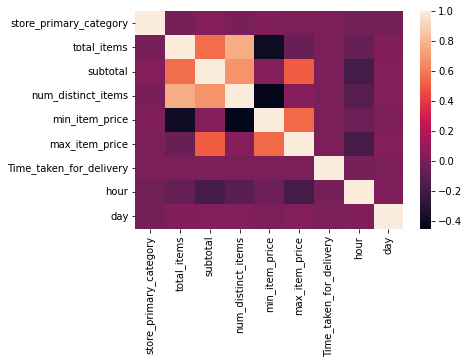

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())

<Axes: xlabel='store_primary_category', ylabel='total_items'>

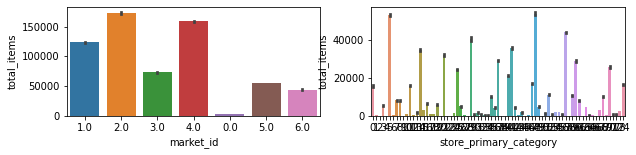

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.barplot(y = 'total_items', x = 'market_id', data = df, estimator = sum)
plt.subplot(1,2,2)
sns.barplot(y = 'total_items', x = 'store_primary_category', data = df, estimator = sum)

In [15]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10,2))
# plt.subplot(1,2,1)
# sns.barplot(y = 'total_items', x = 'market_id', data = df, estimator = np.sum)
# plt.subplot(1,2,2)
# sns.barplot(y = 'total_items', x = 'store_primary_category', data = df, estimator = np.sum)

<Axes: xlabel='order_protocol', ylabel='total_items'>

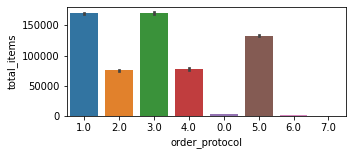

In [16]:
plt.figure(figsize=(5,2))
sns.barplot(y='total_items',x='order_protocol',data=df,estimator=sum)

<Axes: xlabel='hour', ylabel='count'>

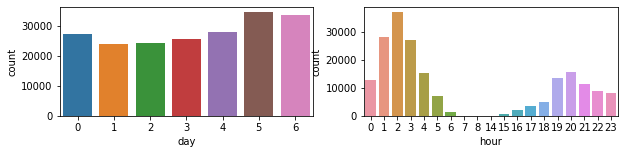

In [17]:
plt.figure(figsize=(10,2))
plt.subplot(121)
sns.countplot(x=df['day'])
plt.subplot(122)
sns.countplot(x=df['hour'])

<Axes: xlabel='hour', ylabel='Time_taken_for_delivery'>

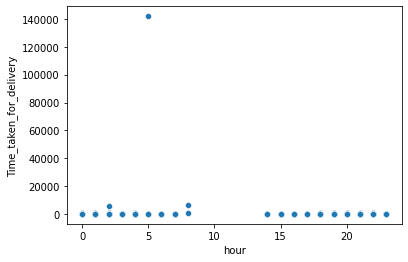

In [18]:
sns.scatterplot(x='hour',y='Time_taken_for_delivery',data=df)

**No Collinearity**

Detecting Outliers

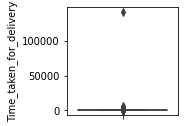

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

Removing Outliers

In [20]:
import numpy as np
print((df.loc[df['Time_taken_for_delivery'] >400].shape[0] / df.shape[0]) * 100)
df.drop(index=df.loc[df['Time_taken_for_delivery'] >400].index[0],inplace=True)

0.009624102805679234


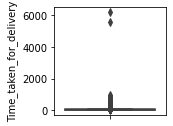

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.boxplot(y='Time_taken_for_delivery',data=df)
plt.xticks(rotation=90);
plt.show()

Model training with random forest (10 points)




*   Data splitting
*   Random forest regression



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
y=df['Time_taken_for_delivery']
x=df.drop(['Time_taken_for_delivery'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
prediction=regressor.predict(X_test)
mse=mean_squared_error(y_test,prediction)
rmse=mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
mae=mean_absolute_error(y_test,prediction)
print("mase : ",mae)
mape=np.mean(np.abs((y_test - prediction)/y_test))*100
print("mape : ",mape)

r2_score(y_test,prediction)

mse :  1300.2799406720324
rmse :  36.05939462431437
mase :  12.846208984470803
mape :  29.58349182566292


0.01723084970784483

**Regression with neural networks (30 points)**


*   Data scaling

*   Defining NN architecture

*   Trying different combinations and hyperparameters
*   Model training


*   Comparing results with random forest


In [24]:
#Scalling the data to feed before neural network

from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
x_scaled=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

We will build a simple neural network to train our regression model it is a sequential model with two layers,

we have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers 32, 32, which can we changed or experimented with

the activation for the layers is kept as relu because it is a great non linear activation function that works for most cases, we could have used leaky relu if we see gradient vanishing.

the last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(11,kernel_initializer='normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='Adam',metrics=['mse','mae'])
history=model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_split=0.2)

Epoch 1/10
247/247 [==============================] - 2s 5ms/step - loss: 1392.1783 - mse: 1392.1783 - mae: 29.4618 - val_loss: 1362.2452 - val_mse: 1362.2452 - val_mae: 14.7470
Epoch 2/10
247/247 [==============================] - 1s 4ms/step - loss: 417.1539 - mse: 417.1539 - mae: 14.2039 - val_loss: 1313.2841 - val_mse: 1313.2841 - val_mae: 13.7728
Epoch 3/10
247/247 [==============================] - 1s 4ms/step - loss: 379.9030 - mse: 379.9030 - mae: 13.4416 - val_loss: 1287.0621 - val_mse: 1287.0621 - val_mae: 13.3476
Epoch 4/10
247/247 [==============================] - 1s 4ms/step - loss: 368.0661 - mse: 368.0661 - mae: 13.2132 - val_loss: 1283.0148 - val_mse: 1283.0148 - val_mae: 13.2582
Epoch 5/10
247/247 [==============================] - 1s 4ms/step - loss: 366.5257 - mse: 366.5257 - mae: 13.1894 - val_loss: 1282.5046 - val_mse: 1282.5046 - val_mae: 13.2999
Epoch 6/10
247/247 [==============================] - 1s 3ms/step - loss: 365.6674 - mse: 365.6674 - mae: 13.1706 - va

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 32)                384       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,594
Trainable params: 1,594
Non-trainable params: 0
_________________________________________________________________


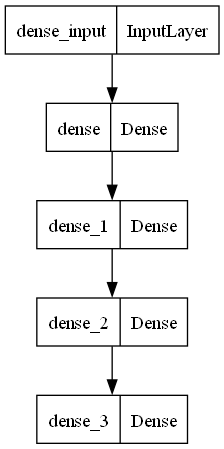

In [26]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model)

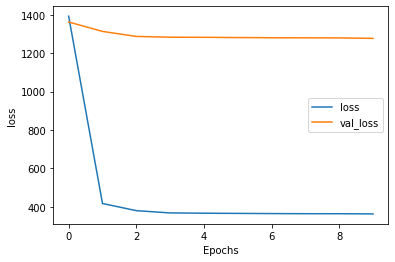

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.show()

In [28]:
print('r2_score:',r2_score(y_test, model.predict(X_test)))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, model.predict(X_test))
print("mae : ",mae)

1234/1234 [==============================] - 2s 2ms/step
r2_score: 0.020032352831149125
1234/1234 [==============================] - 2s 2ms/step
mse :  1296.5733343811453
rmse :  36.007962097029946
errors for neural net
1234/1234 [==============================] - 3s 2ms/step
mae :  13.143213508096352


In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, model.predict(X_test))

1234/1234 [==============================] - 2s 2ms/step


0.304757209787468

By comparing the results of our neural network model with the random forest model we can see that without any tuning or creating pretty complex architectures for training our model we have achieved high accuracy